In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from investigation_functions import ml_visualisation_funcs as mvf

In [56]:
df_svm_4q = pd.read_csv('../ML_results/SVM/svm_4q.csv')
df_svm_8q = pd.read_csv('../ML_results/SVM/svm_8q.csv')
df_svm_16q_ct = pd.read_csv('../ML_results/SVM/svm_16q_circuit_tt.csv')

df_knn_4q = pd.read_csv('../ML_results/KNN/knn_4q_v2.csv')
df_knn_8q = pd.read_csv('../ML_results/KNN/knn_8q_v2.csv')
df_knn_16q_ct = pd.read_csv('../ML_results/KNN/knn_16q_circuit_tt.csv')

In [57]:
svm_4q_8q = [df_svm_4q,df_svm_8q]
svm_4q_8q = mvf.apply_condition_to_dfs(svm_4q_8q,'tr&v circuits',111,equals=False)
svm_4q_8q_ct = mvf.apply_get_same(svm_4q_8q,'tr&v exp_type','test exp_type',drop_same_cols=False)

svm_ct = svm_4q_8q_ct
svm_ct.append(df_svm_16q_ct)

knn_4q_8q = [df_knn_4q,df_knn_8q]
knn_4q_8q = mvf.apply_condition_to_dfs(knn_4q_8q,'tr&v circuits',111,equals=False)
knn_4q_8q_ct = mvf.apply_get_same(knn_4q_8q,'tr&v exp_type','test exp_type',drop_same_cols=False)

knn_ct = knn_4q_8q_ct
knn_ct.append(df_knn_16q_ct)

In [58]:
knn_ct[0].head()

,nr_qubits,machines,tr&v exp_type,tr&v circuits,test exp_type,test circuits,preprocess settings,n_neighbors,param settings,accuracy,cv_1,cv_2,cv_3,cv_4,cv_5
50,4,1111,Hardware,100,Hardware,100,0,5,0,1.0000,1.00000,1.00000,1.000000,1.000000,1.00000
54,4,1111,Simulation,100,Simulation,100,0,5,0,0.9750,0.84375,0.93750,0.921875,0.953125,0.90625
57,4,1111,Refreshed_Simulation,100,Refreshed_Simulation,100,0,5,0,1.0000,1.00000,1.00000,1.000000,1.000000,1.00000
60,4,1111,Hardware,100,Hardware,100,0,5,1,1.0000,1.00000,1.00000,1.000000,1.000000,1.00000
64,4,1111,Simulation,100,Simulation,100,0,5,1,0.9625,0.90625,0.96875,0.953125,0.968750,0.93750


In [59]:
# knn_ct = knn_ct[knn_ct['test exp_type'] == 'Hardware' or knn_ct['test exp_type'] == 'Simulation', knn_ct['test exp_type'] =='Refreshed_Simulation']
# svm_ct = svm_ct[svm_ct['test exp_type'] == 'Hardware' or svm_ct['test exp_type'] == 'Simulation', svm_ct['test exp_type'] =='Refreshed_Simulation']
# svm_ct1 = svm_ct[svm_ct['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])]

In [60]:
# for knn_ct_ in range knn_ct :
#     knn_ct_ = knn_ct[svm_ct['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])]

In [61]:
svm_ct1 = mvf.apply_condition_to_dfs(svm_ct,'tr&v circuits',100)
knn_ct1 = mvf.apply_condition_to_dfs(knn_ct,'tr&v circuits',100)

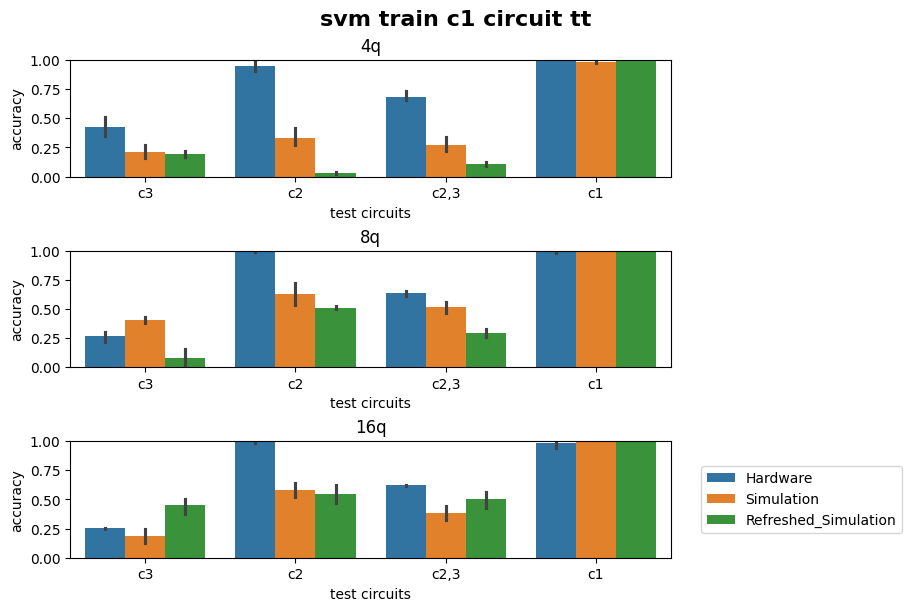

In [62]:
labels = ["c3","c2","c2,3","c1"]
mvf.plot_bar_per_qubit_nr(
    svm_ct1[0][svm_ct1[0]['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])],
    svm_ct1[1][svm_ct1[1]['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])],
    svm_ct1[2][svm_ct1[2]['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])],
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='svm train c1 circuit tt', nr_cat =4,
    labels_ = labels
)

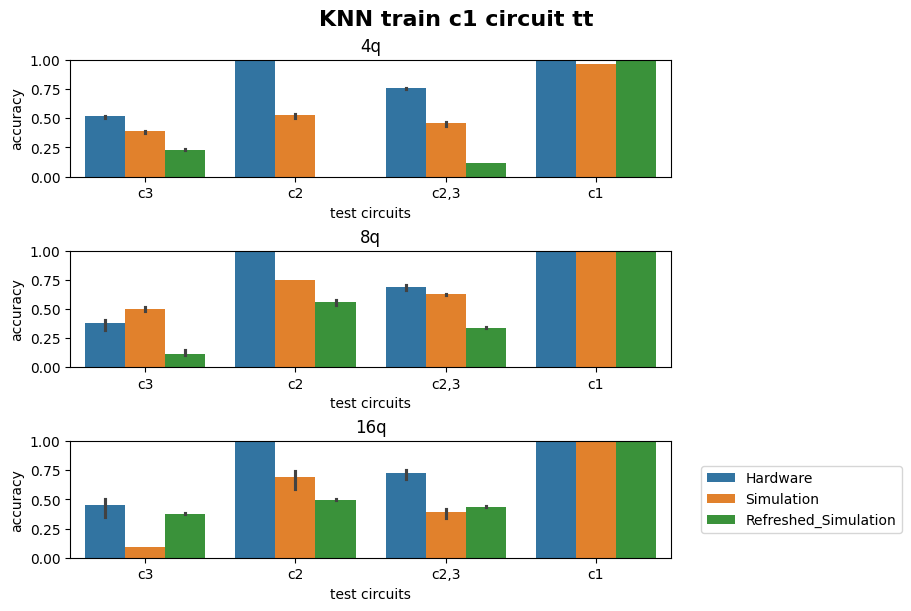

In [63]:
labels = ["c3","c2","c2,3","c1"]
mvf.plot_bar_per_qubit_nr(
    knn_ct1[0][knn_ct1[0]['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])],
    knn_ct1[1][knn_ct1[1]['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])],
    knn_ct1[2][knn_ct1[2]['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])],
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='KNN train c1 circuit tt', nr_cat =4,
    labels_ = labels
)

In [64]:
svm_ct2 = mvf.apply_condition_to_dfs(svm_ct,'tr&v circuits',10)
knn_ct2 = mvf.apply_condition_to_dfs(knn_ct,'tr&v circuits',10)
labels_c2 = ["c3","c2","c1","c1,3"]

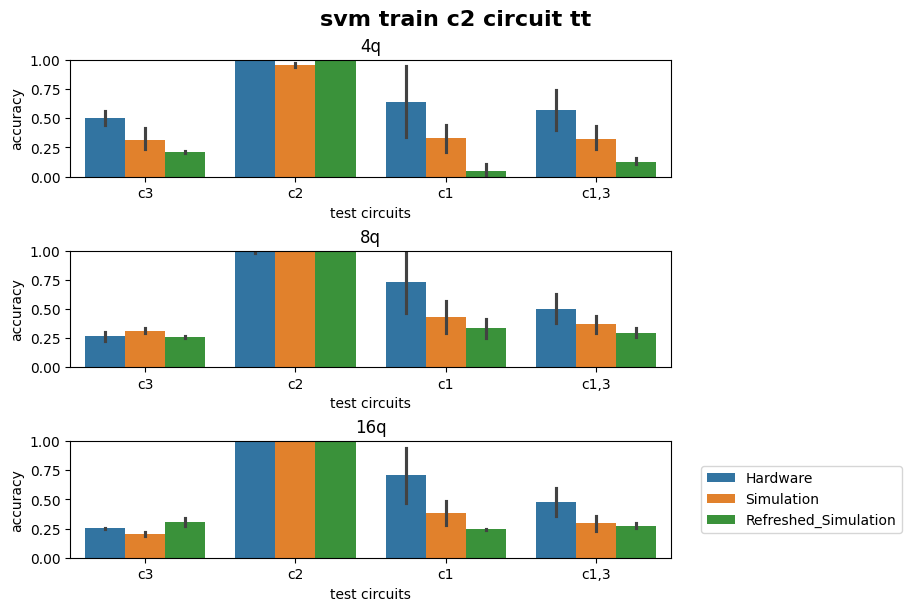

In [65]:
mvf.plot_bar_per_qubit_nr(
    svm_ct2[0][svm_ct2[0]['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])],
    svm_ct2[1][svm_ct2[1]['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])],
    svm_ct2[2][svm_ct2[2]['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])],
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='svm train c2 circuit tt', nr_cat =4,
    labels_ = labels_c2
)

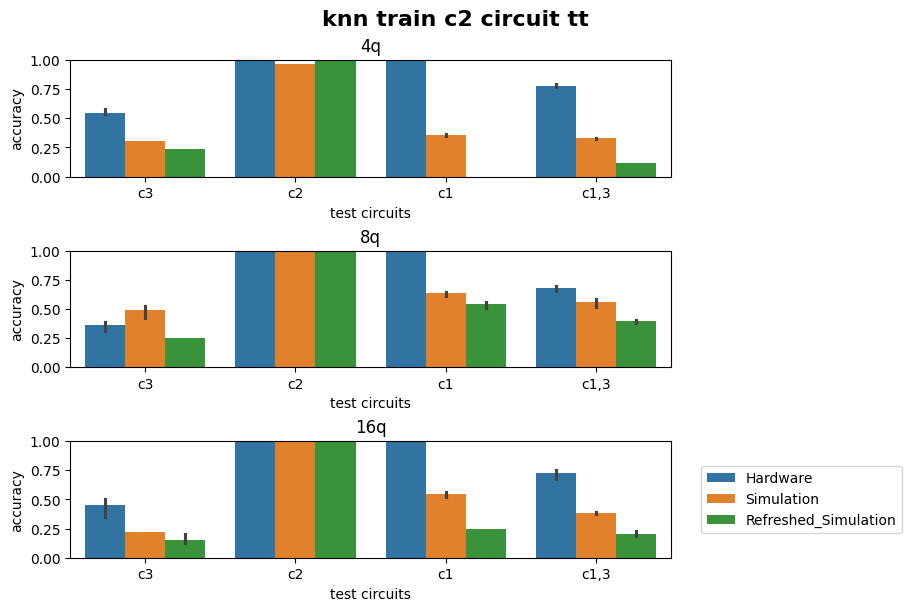

In [66]:
mvf.plot_bar_per_qubit_nr(
    knn_ct2[0][knn_ct2[0]['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])],
    knn_ct2[1][knn_ct2[1]['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])],
    knn_ct2[2][knn_ct2[2]['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])],
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='knn train c2 circuit tt', nr_cat =4,
    labels_ = labels_c2
)

In [67]:
svm_ct3 = mvf.apply_condition_to_dfs(knn_ct,'tr&v circuits',1)
knn_ct3 = mvf.apply_condition_to_dfs(knn_ct,'tr&v circuits',1)
labels_c3 = ["c3","c2","c1","c1,2"]

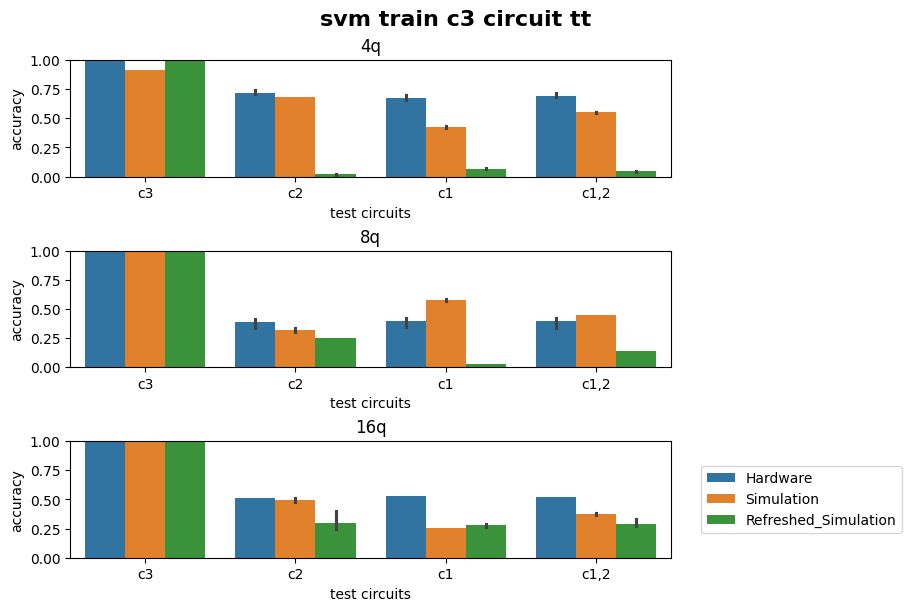

In [68]:
mvf.plot_bar_per_qubit_nr(
    svm_ct3[0][svm_ct3[0]['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])],
    svm_ct3[1][svm_ct3[1]['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])],
    svm_ct3[2][svm_ct3[2]['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])],
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='svm train c3 circuit tt', nr_cat =4,
    labels_ = labels_c3
)

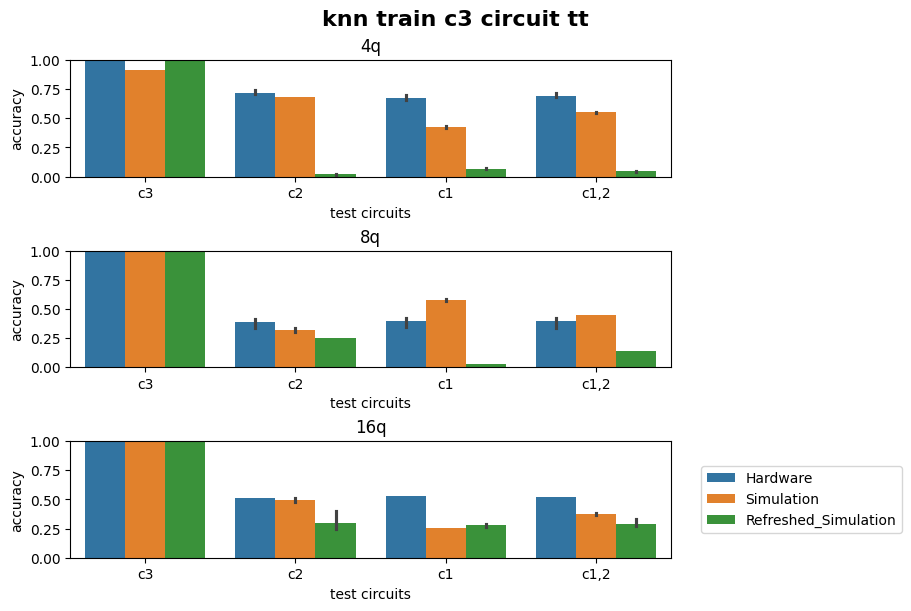

In [69]:
mvf.plot_bar_per_qubit_nr(
    knn_ct3[0][knn_ct3[0]['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])],
    knn_ct3[1][knn_ct3[1]['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])],
    knn_ct3[2][knn_ct3[2]['test exp_type'].isin(['Hardware', 'Simulation', 'Refreshed_Simulation'])],
    x_ = 'test circuits', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='knn train c3 circuit tt', nr_cat =4,
    labels_ = labels_c3
)